In [1]:
#loading required packages
import numpy as np
import pandas as pd

In [3]:
# path of the file
a = '/content/netflix.csv'
df = pd.read_csv(a)

In [5]:
#or
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#getting the first five rows of dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
#getting the shape of the dataset
df.shape

(8807, 12)

In [8]:
#getting a detailed summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
#description of dataset
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
#finding the total number of nulls in data
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
#Un-nesting the dataset
# 1. Initially un-nesting the 'listed-in' column.

df_1 = df.assign(listed_in=df.listed_in.str.split(","))

In [13]:
df_1_list=df_1.explode('listed_in')
df_1_list

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [14]:
# 2. Un-nesting the 'cast' column.

df_2 = df.assign(cast=df.cast.str.split(","))

In [15]:
df_2_list=df_2.explode('cast')
df_2_list

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [16]:
#null values for categorical values

df['director'].replace(np.nan, 'Unknown Director',inplace=True)
df['cast'].replace(np.nan, 'Unknown Cast',inplace=True)
df['country'].replace(np.nan, 'Unknown Country',inplace=True)

#null values for continous values

df['date_added']=df['date_added'].fillna(df['date_added'].mode()[0])
df['rating']=df['rating'].fillna(df['rating'].mode()[0])
df['duration']=df['duration'].fillna(df['duration'].mode()[0])


In [17]:
#converting date_added to date_time datatype

df['date_added'] = pd.to_datetime(df['date_added'])

In [19]:
#getting an insight on the datatypes present in dataset

df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [20]:
# finding the no. of 'movies' and 'Tv shows' present in type.

no_of_type = df['type'].value_counts()
no_of_type

Movie      6131
TV Show    2676
Name: type, dtype: int64

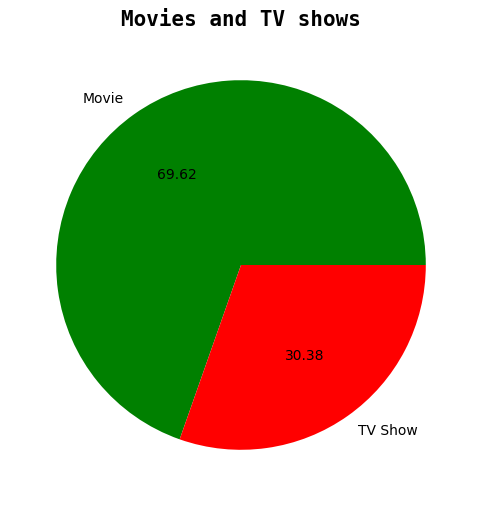

In [21]:
#getting the distribution of 'movies' and 'tv-shows' in a graphical representation

import matplotlib.pyplot as plt
import seaborn as sns

# creation of the pie chart

plt.subplots(figsize=(6,6))
plt.pie(no_of_type.values,labels=no_of_type.index,colors='green', autopct='%.2f')
plt.title("Movies and TV shows", fontsize=15, fontweight="bold", fontname="monospace",  y=1.0)
plt.show()

In [22]:
#Insights

#1. Movies are available mostly on netflix with 69.62%
#2. TV Shows are in less in number with 30.38%.

<Axes: xlabel='rating', ylabel='count'>

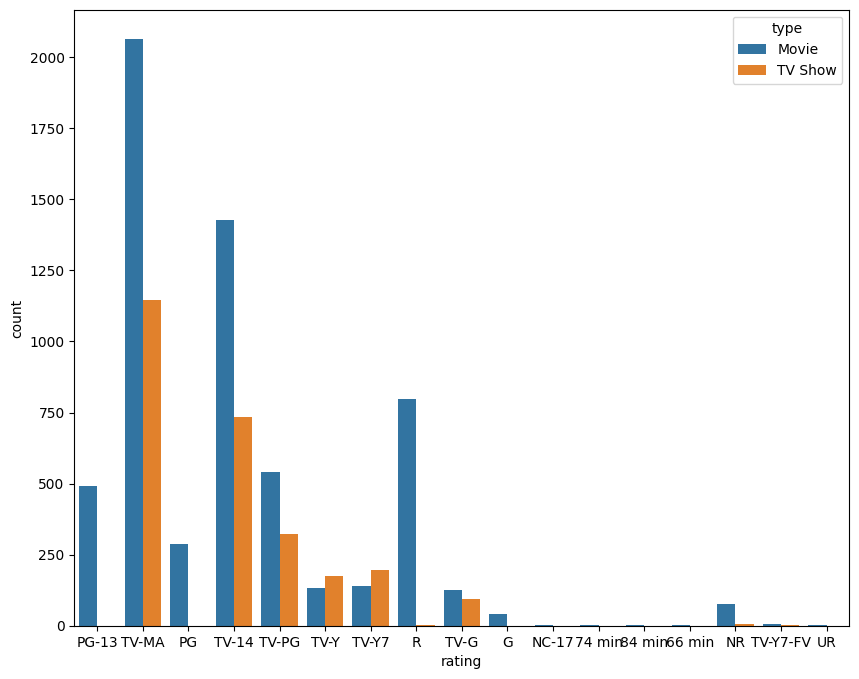

In [23]:
#Most rated content available on netflix

#building a countplot
plt.figure(figsize=(10,8))
sns.countplot(x='rating', hue='type', data=df)

In [24]:
#Insights

#1. TV-MA is the most number of rated programs on netflix.
#2. Mature Audience and teenagers are the target audiences for netflix.
#3. NC-17,TV-Y7,UR  are the least available rated content on this platform, which can be taken as sign that netflix doesn't want to add more content in these types.

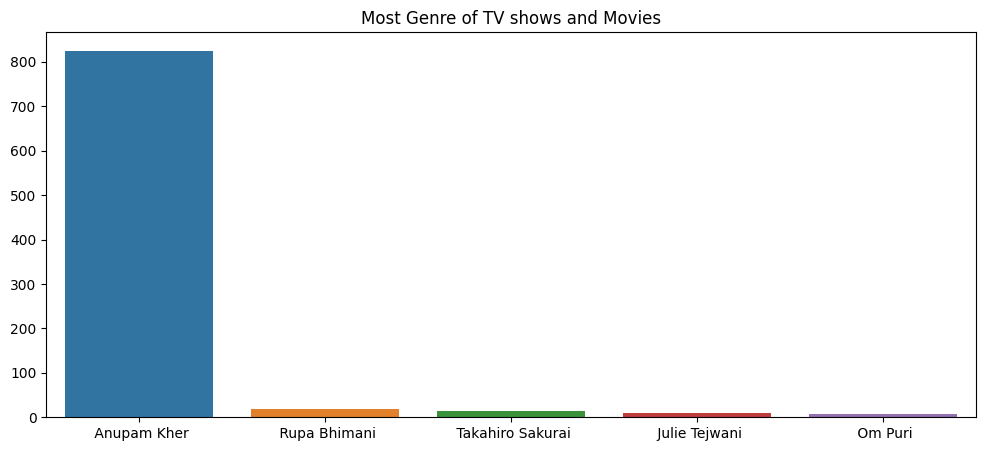

In [25]:
#Most casted actor across all 'movies' and tv shows'

#building the bar plot
plt.subplots(figsize=(12,5))
sns.barplot(x = df_2_list["cast"].value_counts()[:5].keys() , y = df["cast"].value_counts()[:5].values).set(title='Most Genre of TV shows and Movies')
plt.show()

In [26]:
#Insights

#1. Anupam Kher is the most casted actor in movies and tv shows available on netflix, technically can be made an ambassador for his contributions.
#2. From the dataset the top 5 casted actors,most of them are from country 'india', which also indicates indian actors are casted for times.

In [27]:
#assigning different variables per 'tv-show' and 'movie'

df_show = df[df['type']=='TV Show']
df_movie =df[df['type']=='Movie']

In [28]:
#countries producing how many no. of tv shows

shows_country= df_show['country'].value_counts()
shows_country

United States                                    760
Unknown Country                                  391
United Kingdom                                   213
Japan                                            169
South Korea                                      158
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 197, dtype: int64

In [29]:
#top 10 countries producing tv shows

top_10_show=shows_country.head(10)
top_10_show

United States      760
Unknown Country    391
United Kingdom     213
Japan              169
South Korea        158
India               79
Taiwan              68
Canada              59
France              49
Australia           48
Name: country, dtype: int64

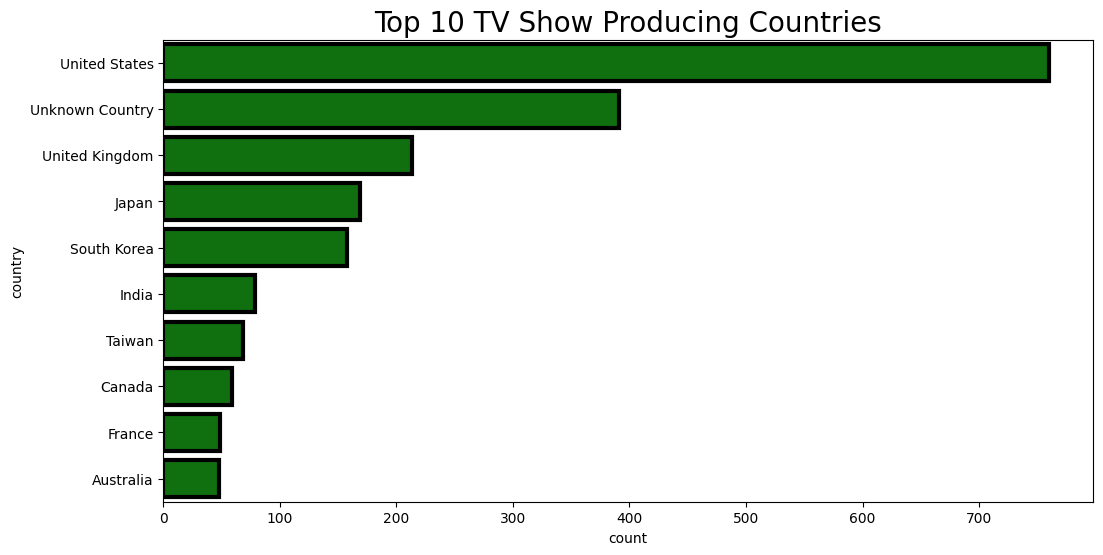

In [30]:
#graphical representation of top 10 countries producing tvshows

#plotting a countplot

plt.figure(figsize=(12,6))
sns.countplot(y='country',order=df_show['country'].value_counts().index[0:10],data=df_show,color='green',ec='black',lw=3)
plt.title('Top 10 TV Show Producing Countries',fontsize=20)
plt.show()

In [31]:
#Insights

#1. United states is the most tv show producing country, Netflix prefers to make tv shows from the local place, comparing to the ones from different countries.
#2. This indicates that netflix is priortizing in making most of the content in english.
#3. Japan delivers highest produced tv show from the asian market,closely followed by southkorea.
#4. CLearly we can see that  Asian market is the second best venture for netflix. which also gives a diverse range of content available on netflix.

In [33]:
#no. of movies produced by countries

movies_country= df_movie['country'].value_counts()
movies_country

United States                            2058
India                                     893
Unknown Country                           440
United Kingdom                            206
Canada                                    122
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 652, dtype: int64

In [34]:
#top 10 movies produced by different countries

top_10_movie=movies_country.head(10)
top_10_movie

United States      2058
India               893
Unknown Country     440
United Kingdom      206
Canada              122
Spain                97
Egypt                92
Nigeria              86
Indonesia            77
Turkey               76
Name: country, dtype: int64

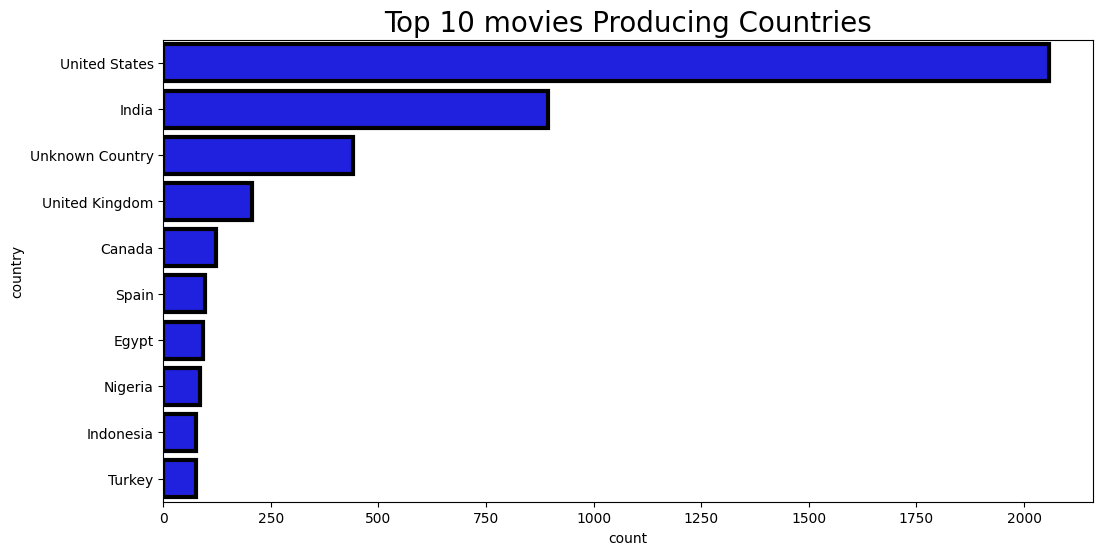

In [35]:
#graphical representation of top 10 movies produced by different countries

#plotting a countplot

plt.figure(figsize=(12,6))
sns.countplot(y='country',order=df_movie['country'].value_counts().index[0:10],data=df_movie,color='blue',ec='black',lw=3)
plt.title('Top 10 movies Producing Countries',fontsize=20)
plt.show()

In [36]:
# Insight

#1. United states produces the most number of movies on netflix as same as tv shows.
#2. Following list shows the diversity of movies available on netflix, movies produced from all continents.
#3. India has the highest movies produced from asian market, whereas egypt has the highest movies produced from africa.

In [37]:
#creating a new column 'week' from date_added.

df['week']=df['date_added'].dt.week.fillna(-1)

<ipython-input-37-b70113cace71>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week']=df['date_added'].dt.week.fillna(-1)


In [38]:
#assigning 'int' datatype to all values in 'week'

df['week']=df['week'].astype('int64')

In [39]:
#best week to launch a 'tv show' on netflix.

df_bestweek=df['week'].value_counts().head(10)
df_bestweek

1     382
44    318
40    287
31    268
26    268
35    263
9     254
13    250
27    240
18    234
Name: week, dtype: int64

<Axes: xlabel='week', ylabel='count'>

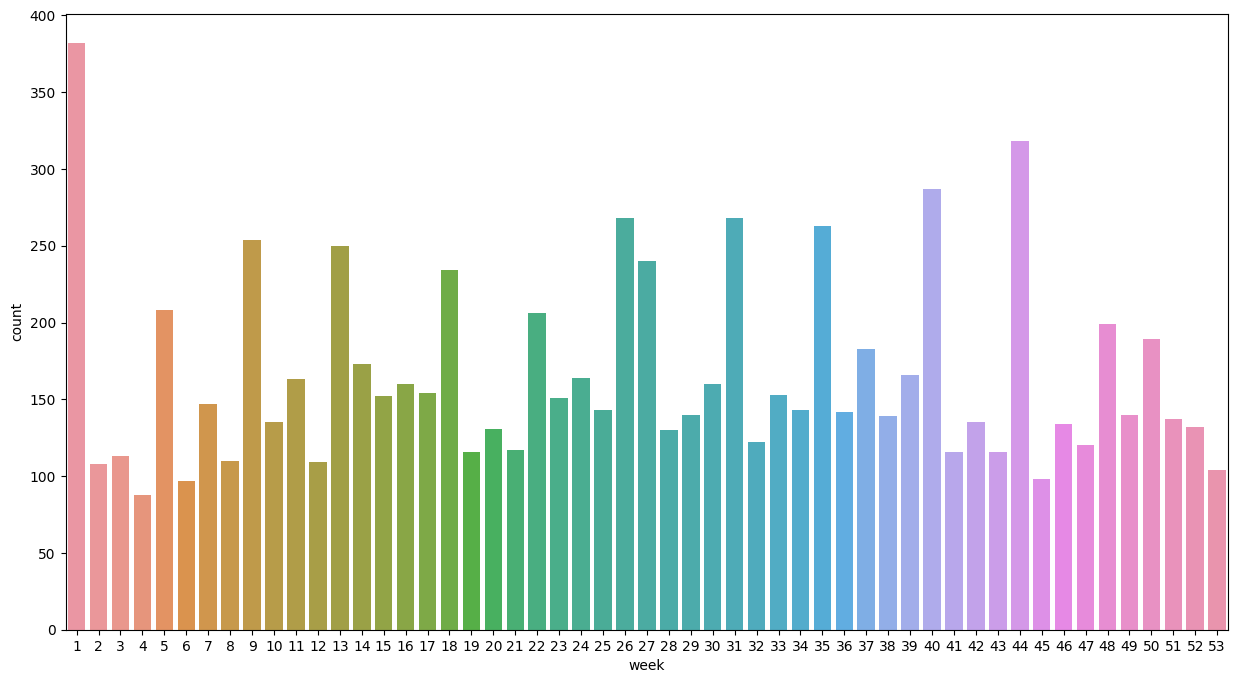

In [40]:
# graphical representation of best week to launch a 'tv show' on netflix.

#plotting a countplot

ax =  plt.subplots(figsize = (15,8))
sns.countplot(data =  df , x = 'week')

In [41]:
#Insight

#1.Most number of movies/tv shows are released in week in opening week of the year which is in january.
#2.The least number of releases is also in the same month, i.e ath 4th week of january.
#3.Also after every week of releasing content at higher amount is immediately followed by a lower releasing rate than the average rate which is observed in week 44 and week 45.

In [42]:
##creating a new column 'month' from date_added.

df['month']=df['date_added'].dt.month.fillna(-1)

In [43]:
##assigning 'int' datatype to all values in 'month'

df['month']=df['month'].astype('int64')

In [44]:
##best month to launch a 'tv show' on netflix.

df_bestmonth=df['month'].value_counts().head(10)
df_bestmonth

7     827
12    813
9     770
4     764
10    760
8     755
1     748
3     742
6     728
11    705
Name: month, dtype: int64

<Axes: xlabel='month', ylabel='count'>

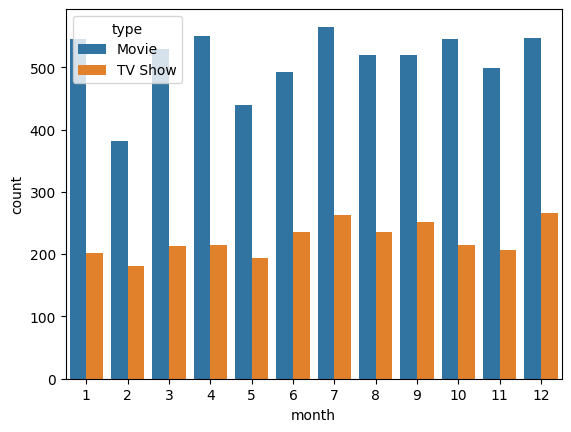

In [45]:
# graphical representation of best month to launch a 'tv show' on netflix.

#plotting on countplot

sns.countplot(x='month',hue='type', data=df)

In [46]:
#Insights

#1.July is the best month to release a movie in the netflix with higher no. of releases made in that month.
#2.July and december are the best months to release a tv show.
#3.Febuary has least count of releases in both movie and Tv show category.

In [47]:
#getting no. of movies or tv shows appeared by director

no_of_director = df.groupby("director")["show_id"].count()

In [48]:
# top 10 no. of movies or tv shows appeared by director

top_director=no_of_director.sort_values(ascending=False)
top_director

director
Unknown Director                         2634
Rajiv Chilaka                              19
Raúl Campos, Jan Suter                     18
Marcus Raboy                               16
Suhas Kadav                                16
                                         ... 
Jose Gomez                                  1
Jose Javier Reyes                           1
Billy Bob Thornton                          1
Joseduardo Giordano, Sergio Goyri Jr.       1
Khaled Youssef                              1
Name: show_id, Length: 4529, dtype: int64

<Axes: xlabel='director', ylabel='count'>

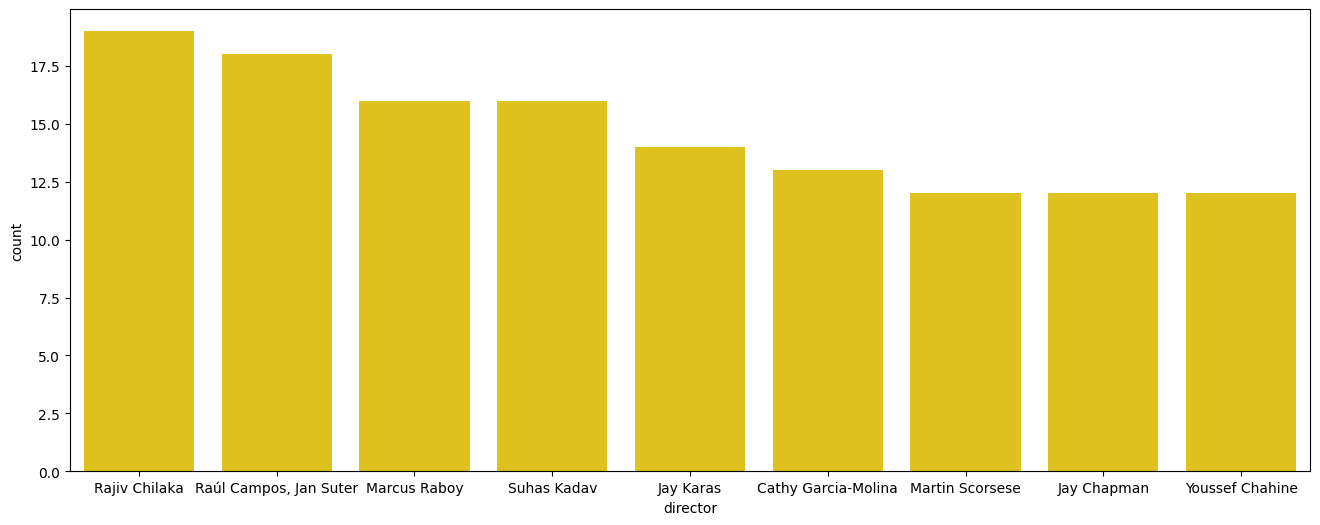

In [49]:
#graphical representation of top 10 no. of movies or tv shows appeared by director

#plotting on countplot

plt.figure(figsize=(16,6))
sns.countplot(x='director',order=top_director.index[1:10],data=df,color='gold')

In [61]:
#top 10 popular genre of films available on netflix

df_bestgenre=df_1_list['listed_in'].value_counts().head(10)
df_bestgenre_str=str(df_bestgenre)

 International Movies     2624
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     774
 Independent Movies        736
 TV Dramas                 696
 Romantic Movies           613
Name: listed_in, dtype: int64

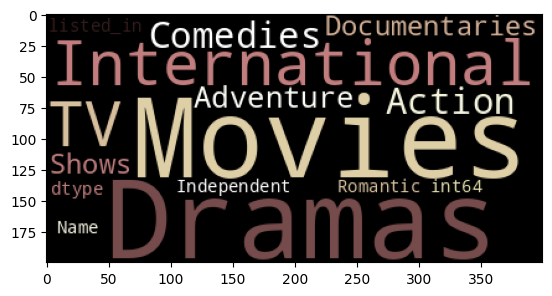

In [51]:
# graphical representation of top 10 popular genre of films available on netflix

#creating a word cloud

from wordcloud import WordCloud
wc= WordCloud(colormap='pink').generate(df_bestgenre_str)
plt.imshow(wc)


In [62]:
#Insights

#1.International movies are avialble at highest in genre wise content of movies.
#2.Dramas and comedies are the main source of genre in content creation in netflix.

In [52]:
#creating a release_date column

df['release_date'] = pd.to_datetime(df['release_year'], format='%Y')

In [53]:
#getting difference on how many days the movie will be added to Netflix after the release of the movie.

df_release_diff = (df['date_added'] - df['release_date']).dt.days
df_release_diff.head(10)

0      633
1      266
2      266
3      266
4      266
5      266
6      266
7    10493
8      266
9      266
dtype: int64

In [54]:
#average days gap between date added and release

avg_df_release_diff = df_release_diff.mean()
avg_df_release_diff


1896.8234359032588

In [55]:
# mode of days gap between date added and release

mode_df_release_diff=df_release_diff.mode()
mode_df_release_diff

0    334
dtype: int64

In [56]:
#creating year_added column

df['year_added']=df['date_added'].dt.year.fillna(-1)

In [57]:
#assigning int datatype

df['year_added']=df['year_added'].astype('int64')

In [58]:
#getting yearly difference between date added and release year on netflix.

df_release_diff_yr = (df['year_added'] - df['release_year'])
df_release_diff_yr.head(10)

0     1
1     0
2     0
3     0
4     0
5     0
6     0
7    28
8     0
9     0
dtype: int64

In [59]:
#average yearly release on netflix

avg_df_release_diff_yr = df_release_diff_yr.mean()
avg_df_release_diff_yr

4.692971499943227

Text(0, 0.5, 'Year added')

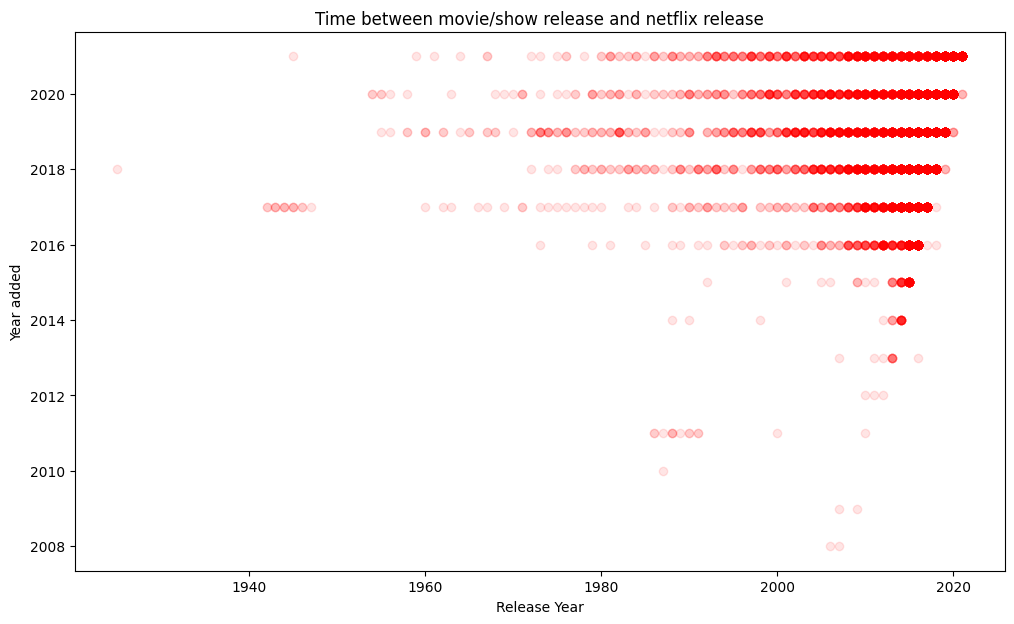

In [60]:
# graphical representation of time taken between movie/show release and netflix release.

#assigning x and y axis

x=df["release_year"]
y=df["year_added"]
plt.figure(figsize=(12,7))

#creating a scatter plot

plt.scatter(x,y,alpha=0.1,c='r')
plt.title("Time between movie/show release and netflix release")
plt.xlabel("Release Year")
plt.ylabel("Year added")

In [ ]:
#Insights

#1. The frequency of movie/tv shows added in netflix after release at shorter frame time has imporved drastically.
#2. 2020 and 2021 experiences least difference in time between date added and year released.
#3. There are movies form older years to ponder audiences from older generation or revisit the classic movies from that time.
#4. The uprise in trend can be observed from 2015 where more content is started to generate.

In [ ]:
#Recommendations

#1.Amount of TV-shows produced on netflix should be balanced with respect to movies which are of higher number.
#2.Maintaining consistency at the time of releasing weekly content, since higher rate of releases are mostly followed by a depression.
#3.Improving the situation in the february month, since it holds the least amount of movie and tv show releases.
#4.Increasing the wide of range of genres in netflix as it is mainly occupied by international movies and tv shows of dramas, comedies and documemntries.
#5.Focussing on generating content for mature audience and teens as they are the target audience.
#6.Improving the TV show production in different countries apart from US,UK and asian countries.
#7.Steadily increasing the content year by year with lesser time gap between release year and date added.